In [2]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib as mpl 
import matplotlib.pyplot as plt

sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')
import icenumerics as ice

import auxiliary as aux
import montecarlo_tools as mc
import chirality_tools as chir
from parameters import params
ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice

In [3]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
vis_path = '../data/sims'
trj_raw = pd.read_csv(os.path.join(vis_path,'30','trj','trj1.csv'),index_col=[0,1])

In [4]:
particle = ice.particle(radius = params["particle_radius"],
            susceptibility = params["particle_susceptibility"],
            diffusion = params["particle_diffusion"],
            temperature = params["particle_temperature"],
            density = params["particle_density"])

trap = ice.trap(trap_sep = params["trap_sep"],
            height = params["trap_height"],
            stiffness = params["trap_stiffness"])


params["particle"] = particle
params["trap"] = trap


In [23]:
initial_frame = (params['framespersec'] * 0).magnitude
vrt_df = pd.read_csv(os.path.join(vis_path,'30','vertices','vertices6.csv'), index_col=[0,1] )
vrt_frames = vrt_df.index.get_level_values("frame").unique().to_list()
analysis_frames = [frame for frame in vrt_frames if frame > initial_frame][::5]
analysis_frames

[20,
 120,
 220,
 320,
 420,
 520,
 620,
 720,
 820,
 920,
 1020,
 1120,
 1220,
 1320,
 1420,
 1520,
 1620,
 1720,
 1820,
 1920,
 2020,
 2120,
 2220,
 2320,
 2420,
 2520,
 2620,
 2720,
 2820,
 2920,
 3020,
 3120,
 3220,
 3320,
 3420,
 3520,
 3620,
 3720,
 3820,
 3920,
 4020,
 4120,
 4220,
 4320,
 4420,
 4520,
 4620,
 4720,
 4820,
 4920,
 5020,
 5120,
 5220,
 5320,
 5420,
 5520,
 5620,
 5720,
 5820,
 5920,
 6020,
 6120,
 6220,
 6320,
 6420,
 6520,
 6620,
 6720,
 6820,
 6920,
 7020,
 7120]

In [29]:
psi= []
for frame in tqdm(analysis_frames):
    results = [chir.get_charge_order_on_frame_on_realization(params,data_path,frame,realization,tol=1.6) for realization in range(1,10+1) ]
    psi.append(results)

100%|██████████| 72/72 [22:31<00:00, 18.77s/it]


In [36]:
psidf = pd.DataFrame(psi)
psidf['frame'] = analysis_frames
psidf.set_index('frame',inplace=True)
psidf.to_csv('../data/sims/kappa.csv')

In [12]:
psidf = pd.read_csv('../data/sims/kappa.csv', index_col='frame')
analysis_frames = psidf.index.to_numpy()
psi = psidf.to_numpy()

In [14]:
N = 899
psi_av = np.array(np.abs(psi)).mean(axis=1)
nav = psi_av/4/N
psi_std = np.array(np.abs(psi)).std(axis=1)
nstd = psi_std/4/N
time = np.array(analysis_frames)/20
field = 10/300 * time

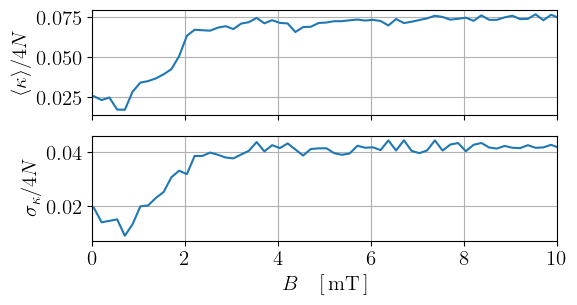

In [17]:
fig, axes = plt.subplots(2,1,figsize=(6,3))

ax = axes[0]
ax.plot(field,nav)
ax.set_xlim(0,10)
ax.set_xticklabels([])
#ax.set_ylim(0,1)
#ax.set_yticks(list(range(0,301,100)))
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('$\\langle \\kappa \\rangle / 4N$', fontsize=15)
ax.set_xlim(0,10)

ax.grid()

ax = axes[1]
ax.plot(field,nstd)
ax.set_xlim(0,10)
#ax.set_ylim(0,1)
#ax.set_yticks(list(range(0,201,50)))
ax.tick_params(axis='both', which='major', labelsize=15)




ax.set_xlabel('$B$ \\,\\, [\\,mT\\,]', fontsize=15)
ax.set_ylabel('$\\sigma_\\kappa / 4N$', fontsize=15)
ax.grid()

plt.show()

fig.savefig('../data/figs/fig3cd.png', dpi=300,bbox_inches='tight')
fig.savefig('../data/figs/fig3cd.pdf')

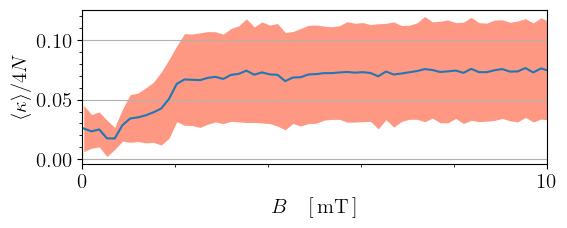

In [28]:
fig, ax = plt.subplots(figsize=(6,2))

ax.plot(field,nav)
ax.fill_between(field, nav-nstd, nav+nstd,
    alpha=1,edgecolor='#FF2D00',
    facecolor='#FF9882',
    linewidth=0)

ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.NullLocator())
ax.xaxis.set_minor_formatter(plt.NullFormatter())

ax.yaxis.set_major_locator(plt.MultipleLocator(0.05))
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.yaxis.set_minor_formatter(plt.NullFormatter())


ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_ylabel('$\\langle \\kappa \\rangle / 4N$', fontsize=15)

ax.set_xlabel('$B$ \\,\\, [\\,mT\\,]', fontsize=15)
ax.set_xlim(0,10)
ax.grid()

ax.minorticks_on()


plt.show()

fig.savefig('../data/figs/fig3cd.png', dpi=300,bbox_inches='tight')
fig.savefig('../data/figs/fig3cd.pdf')